<b><center>Chatura Samarasinghe<br>
Regression</center></b>

In [114]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()

In [115]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [116]:
iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [117]:
X = iris["data"][:,3:]
y = (iris["target"] == 2).astype(np.int)

Logistic Regresssion

In [118]:
from sklearn.linear_model import LogisticRegression 

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Decision boundaries

In [119]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

Plots

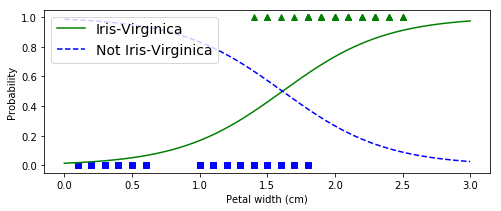

In [123]:
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica") 
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.legend(loc="upper left", fontsize=14)
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.show()


Softmax Regression

In [124]:
X = iris["data"][:,(0,1)]
y = iris["target"]

softmax_reg_new = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10) 
softmax_reg_new.fit(X, y)
pred = softmax_reg_new.predict(x_reg)

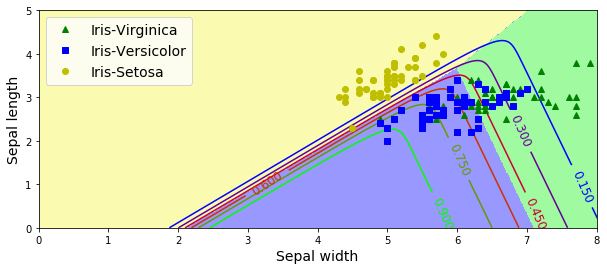

In [125]:
x0, x1 = np.meshgrid(
        np.linspace(0, 9, 500).reshape(-1, 1),
        np.linspace(0, 5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]


softmax_reg_new = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10) 
softmax_reg_new.fit(X, y)
y_predict = softmax_reg_new.predict(X_new)
Y_proba = softmax_reg_new.predict_proba(X_new)


zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Sepal width", fontsize=14)
plt.ylabel("Sepal length", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 8, 0, 5])
plt.show()